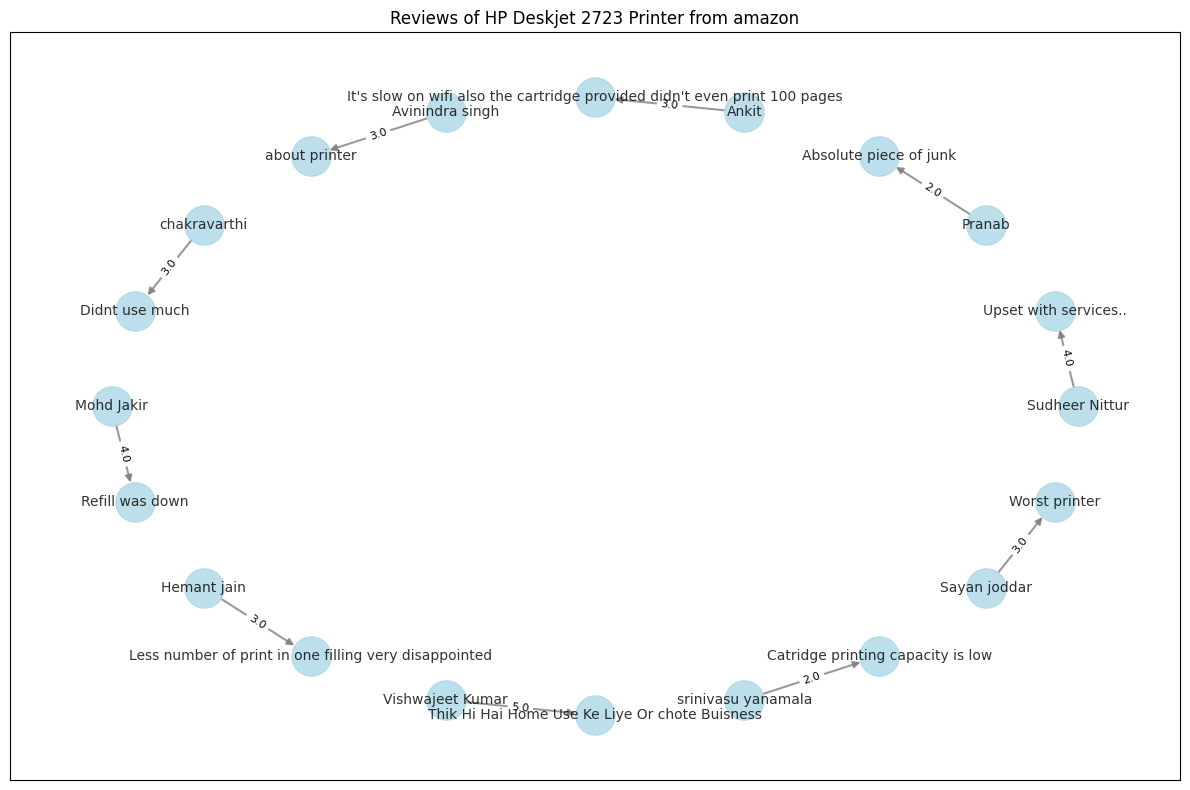

In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import pickle

# Load the data
data = pd.read_csv('D:\\reviews.csv')

# Create a directed graph
graph = nx.DiGraph()

# Iterate over the data and add nodes and edges to the graph
for index, row in data.iterrows():
    source = row['Customer Name']
    target = row['Review Title']
    rating = row['Rating']
    weight = float(rating.split()[0])  # Extract the numerical part of the rating
    if source not in graph.nodes:
        graph.add_node(source)
    if target not in graph.nodes:
        graph.add_node(target)
    if graph.has_edge(source, target):
        graph[source][target]['weight'] += weight
    else:
        graph.add_edge(source, target, weight=weight)

# Calculate the positions of the nodes in a circular layout
pos = nx.circular_layout(graph)

# Draw the graph with increased spacing based on edge weights
plt.figure(figsize=(12, 8))
edge_labels = nx.get_edge_attributes(graph, 'weight')
nx.draw_networkx(graph, pos, with_labels=True, node_color='lightblue', edge_color='gray',
                 node_size=800, font_size=10, width=1.5, alpha=0.8)
nx.draw_networkx_edge_labels(graph, pos, edge_labels=edge_labels, font_size=8)

# Adjust node positions based on edge weights
scale = 1.2  # Scale factor for adjusting the positions
shifted_pos = {node: (x + scale * pos[node][0], y + scale * pos[node][1]) for node, (x, y) in pos.items()}
nx.draw_networkx_labels(graph, shifted_pos, font_size=10)

plt.title('Reviews of HP Deskjet 2723 Printer from amazon')
plt.tight_layout()  # Adjust spacing

# Save the knowledge graph to a file
with open('knowledge_graph.pickle', 'wb') as f:
    pickle.dump(graph, f)

# Show the graph
plt.show()
